# MNIST Digit Recognizer using PyTorch
# Author: Muhammad Babar Ayyaz
# Date: 17/10/25



In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)


100%|██████████| 9.91M/9.91M [00:02<00:00, 4.76MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 125kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.18MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.65MB/s]


In [3]:
class DigitClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = DigitClassifier()


In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [5]:
epochs = 10
for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")


Epoch 1/10, Loss: 0.3969
Epoch 2/10, Loss: 0.1863
Epoch 3/10, Loss: 0.1347
Epoch 4/10, Loss: 0.1105
Epoch 5/10, Loss: 0.0949
Epoch 6/10, Loss: 0.0819
Epoch 7/10, Loss: 0.0731
Epoch 8/10, Loss: 0.0667
Epoch 9/10, Loss: 0.0594
Epoch 10/10, Loss: 0.0562


In [6]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy = 100 * correct / total
print(f"🎯 Test Accuracy: {accuracy:.2f}%")


🎯 Test Accuracy: 97.49%


Actual: 7, Predicted: 7


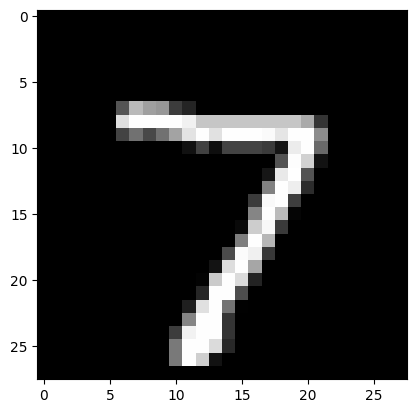

In [9]:
import matplotlib.pyplot as plt
image, label = test_data[0]
plt.imshow(image.squeeze(), cmap="gray")
with torch.no_grad():
    pred = model(image.unsqueeze(0))
    predicted_label = torch.argmax(pred).item()
print(f"Actual: {label}, Predicted: {predicted_label}")


In [7]:
torch.save(model.state_dict(), "mnist_model.pth")
print("Model saved successfully!")


Model saved successfully!


In [8]:
model.load_state_dict(torch.load("mnist_model.pth"))
model.eval()


DigitClassifier(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)